## Import Dependencie and data

In [1]:
!!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

['WARNING: Ignoring invalid distribution -ip (d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages)',
 'WARNING: Ignoring invalid distribution -ip (d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages)',
 'Requirement already satisfied: tensorflow in d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages (2.13.0)',
 'Collecting tensorflow-gpu',
 '  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)',
 'Requirement already satisfied: matplotlib in d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages (3.7.5)',
 'Requirement already satisfied: tensorflow-datasets in d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages (4.9.2)',
 'Collecting ipywidgets',
 '  Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)',
 'Requirement already satisfied: tensorflow-intel==2.13.0 in d:\\pythonprojects\\deepcnn image clasif\\classifvnv\\lib\\site-packages (from tensorflow) (2.13.0)',
 'Requirement alre

In [2]:
#!!pip list
import tensorflow as tf 

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Viz Data and build dataset

In [3]:
import tensorflow_datasets as tfds 
from matplotlib import pyplot as plt

d:\PythonProjects\AI-PROJECTS\classifVnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# loading data from tenserflow dataset from online to machin 
ds = tfds.load('fashion_mnist',split='train' )

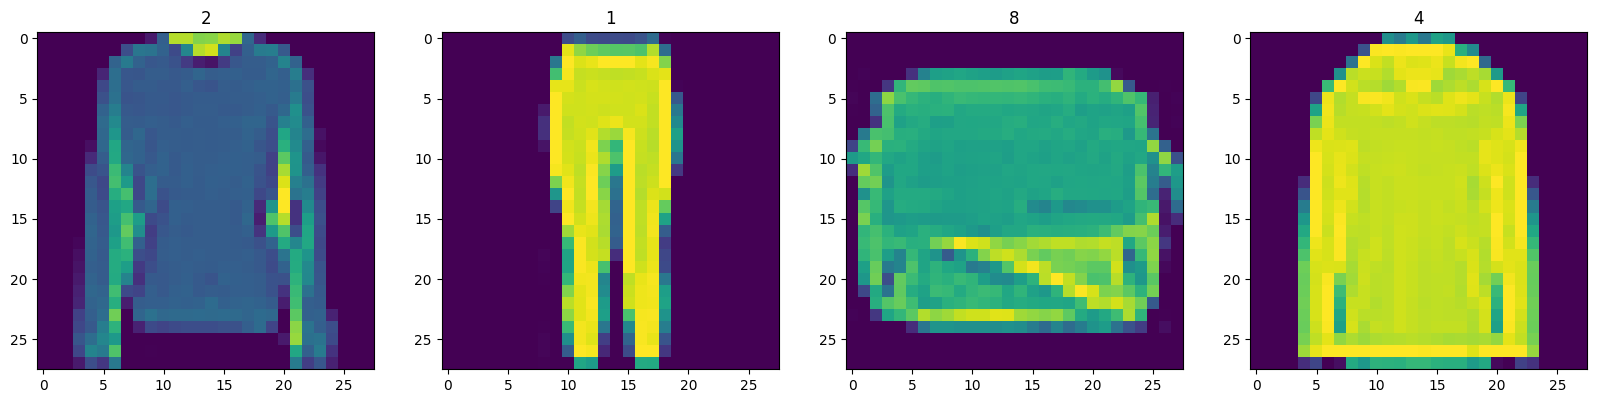

In [5]:
#to do some data transformation 
import numpy as np 
iterator_data= ds.as_numpy_iterator()


fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for indx in range(4):
    batch =  iterator_data.next()
    ax[indx].imshow(np.squeeze(batch['image']))
    ax[indx].title.set_text(batch['label'])

In [6]:
#scale and return image only
def sacle_image(data):
    image = data['image']
    return image/255

## Build Neural Network 

In [7]:
#creat our pipline 
ds = tfds.load('fashion_mnist',split='train' )
ds = ds.map(sacle_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)


##### 1.1 Import Model Components 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

##### 1.2 Build Generatore

In [9]:
def build_generator ():
    model = Sequential()

    #take rabdom values an reshape it to 7*7*128
    # Beginning of generated image
    model.add(Dense(7*7*128 , input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    #Up sampling Block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    #Up sampling Block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    #Convelution block  1
    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    #Convelution block  2
    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    #conv layer to get one chaneel 
    model.add(Conv2D(1,4,padding ='same', activation='sigmoid'))


    return model

In [10]:
generatorModel = build_generator()
generatorModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 1s 682ms/step


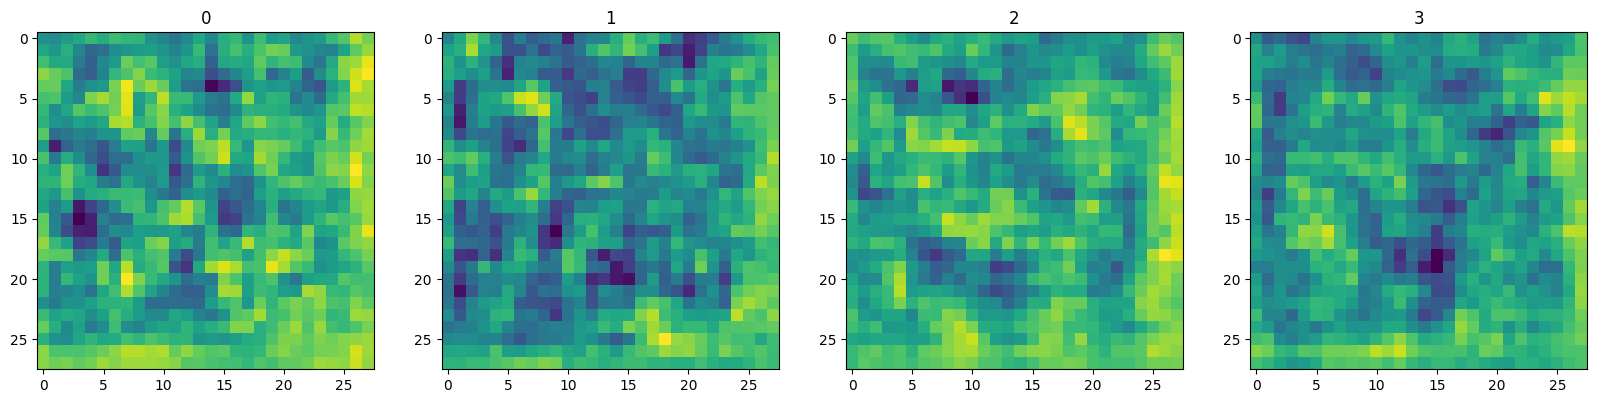

In [11]:

img = generatorModel.predict(np.random.randn(4,128,1))

fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for indx, img in enumerate(img):
    batch =  img
    ax[indx].imshow(np.squeeze(batch))
    ax[indx].title.set_text(indx)

# Build Discriminator 

In [12]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # second Conv Block 
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Forth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    return model

In [13]:
discriminatore = build_discriminator()
discriminatore.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [14]:
img = generatorModel.predict(np.random.randn(4,128,1))
discriminatore.predict(img)

1/1 [==============================] - 0s 80ms/step


array([[0.4962536 ],
       [0.4962753 ],
       [0.49621522],
       [0.49623793]], dtype=float32)

# Construct Training Loop

#### Setup Losses and Optimizer 

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy 

In [16]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)


In [17]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


##### Build Subclassed Model

In [18]:
from tensorflow.keras.models import Model

In [19]:
class FashionGAN(Model):
    def __init__(self, generator ,discriminator , *args, **Kwargs ):

        #pass to super 
        super().__init__(*args, **Kwargs)


        # create attributes for gen and dis 

        self.generator = generator
        self.discriminator = discriminator


    def compile(self, g_opt,d_opt, g_loss, d_loss, *args, **kwargs ):
        super().comile(*args, **kwargs)


        #Create attribute for losses and optimizers 
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch ):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128,1)), training = False)

        #Train the discriminator 
        with tf.GradientTap() as d_tape:
           
            #pass the real and fake images todiscriminator 
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            yhat_realfake = tf.concat(yhat_real, yhat_fake, axis=0)

            #create labels for real fak images 
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # add some nouse th the TRUE outputs 
            noise_real = 0.15*tf.random.uniform(tf.shap(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shap(yhat_real))
            y_realfake+=tf.concat([noise_real, noise_fake], axis=0)

            #calculate loss 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        #applay backpropagation - nn learn 
        ggrad = d_tape.gradient(total_d_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_d_loss}
        


#### Build Calback

##### Train